In [1]:
# import libraries
#!pip install turicreate
import numpy as np
import pandas as pd
#import turicreate
from sklearn.preprocessing import OneHotEncoder

In [2]:
# libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Encoders
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

# Strategic imports
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Machine learning Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, VotingClassifier

from tensorflow import keras
import tensorflow as tf

# imports to mute warnings
pd.options.display.max_rows=200
pd.set_option('mode.chained_assignment', None)

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=RuntimeWarning)

print("sns.__version__", sns.__version__)
#print("sklearn.__version__", sklearn.__version__)

sns.__version__ 0.11.1


In [3]:
train = pd.read_csv('../input/alc-datathon-2021/covid_mental_health_train.csv')
test = pd.read_csv('../input/alc-datathon-2021/covid_mental_health_test.csv')

In [4]:
# summary stats
train.describe()

,city,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,current_physical,past_physical,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
count,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,...,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000
mean,3.424274,1.525784,46.088269,1.649826,1.939721,1.911498,1.619628,3.644367,1.956330,1.923461,...,3.444483,5.263879,4.044948,3.853542,2.696748,3.449129,4.032288,2.761092,3.731707,3.866783
std,2.008436,0.499364,14.727426,1.118760,0.238016,0.284040,0.485506,2.894053,0.204372,0.265874,...,2.048828,1.856211,1.665193,1.871971,1.767901,1.833790,1.761642,1.762319,1.883783,2.050931
min,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,34.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,1.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000
50%,3.000000,2.000000,46.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,...,4.000000,6.000000,4.000000,4.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000
75%,5.000000,2.000000,57.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,...,5.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
max,7.000000,2.000000,89.000000,5.000000,2.000000,2.000000,2.000000,10.000000,2.000000,2.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [5]:
train.columns.tolist()

['city',
 'gender',
 'age',
 'job',
 'health_worker_self',
 'health_worker_family',
 'family_status',
 'income_group',
 'current_physical',
 'past_physical',
 'current_mental',
 'past_mental',
 'exercise',
 'healthy_diet',
 'healthy_sleep',
 'activity',
 'interaction_offline',
 'interaction_online',
 'preventive_behaviors',
 'optimism',
 'deterioration_economy',
 'deterioration_interact',
 'frustration',
 'covid_anxiety',
 'covid_sleepless',
 'difficulty_living',
 'difficulty_work',
 'target']

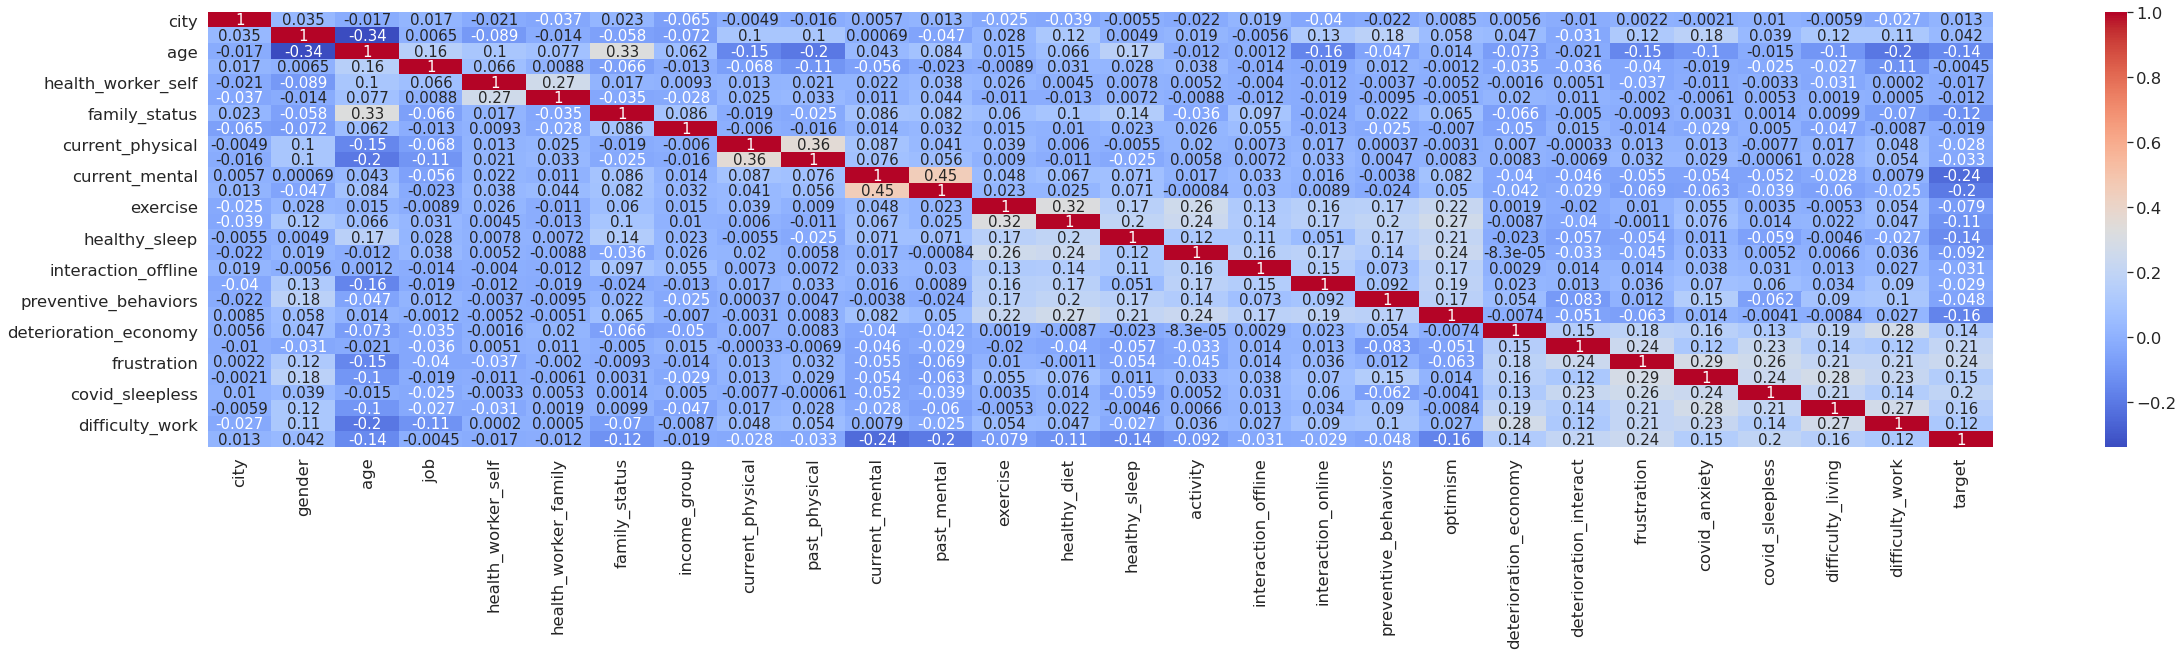

In [6]:
plt.figure(figsize=(40, 8))
sns.set(font_scale=1.5)
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, annot_kws={'size':15})
plt.show()

#current_mental mostly co-rrelates to target

# Income_group

In [7]:
cat = pd.cut(train.income_group,bins=[1, 3, 6, 10],labels=['low','mid','high'])
train.insert(2, "income_group_binning", cat)
train.head()

,city,gender,income_group_binning,age,job,health_worker_self,health_worker_family,family_status,income_group,current_physical,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,target
0,1,1,NaN,65,4,2,2,1,1,2,...,5,4,1,1,5,2,1,3,5,False
1,4,1,low,68,1,2,2,2,3,2,...,7,5,4,4,4,4,1,2,4,False
2,2,1,low,68,4,2,2,2,3,2,...,5,5,1,1,1,5,2,1,1,False
3,7,1,mid,66,4,2,2,2,5,2,...,6,4,1,5,1,1,5,2,1,False
4,2,1,high,72,4,2,2,2,10,2,...,6,5,2,1,1,6,1,1,4,False
